In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('Finbert_output_AAPL.csv')

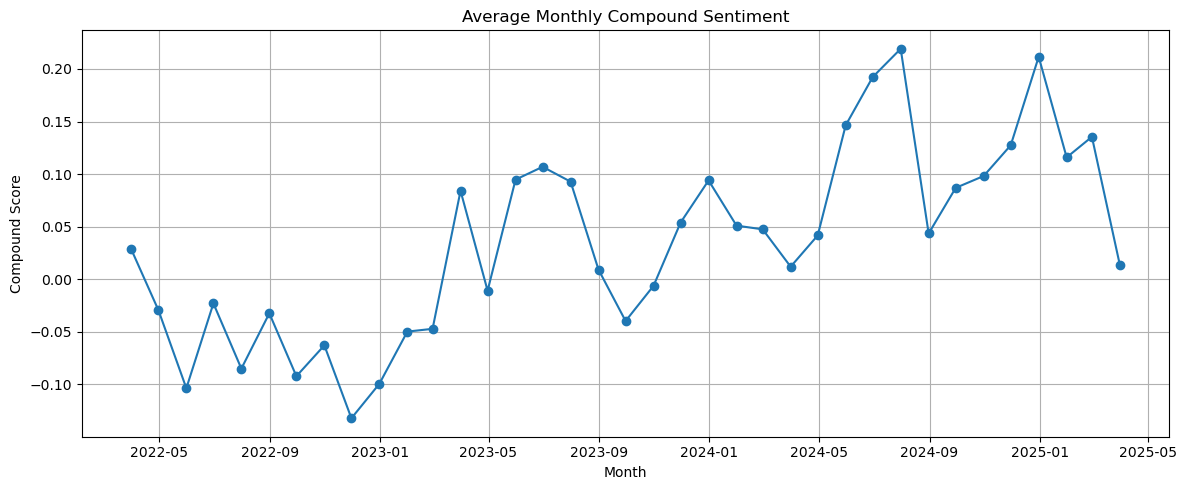

In [12]:
# If 'Date' is already the index, no need to set again
monthly_sentiment = df['Compound'].resample('ME').mean().reset_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(monthly_sentiment['Date'], monthly_sentiment['Compound'], marker='o', linestyle='-')
plt.title('Average Monthly Compound Sentiment')
plt.xlabel('Month')
plt.ylabel('Compound Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Ensure the column names are stripped of spaces (just in case)
df.columns = df.columns.str.strip()

# Create the Dominant_Sentiment column based on max score
df['Dominant_Sentiment'] = df[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)


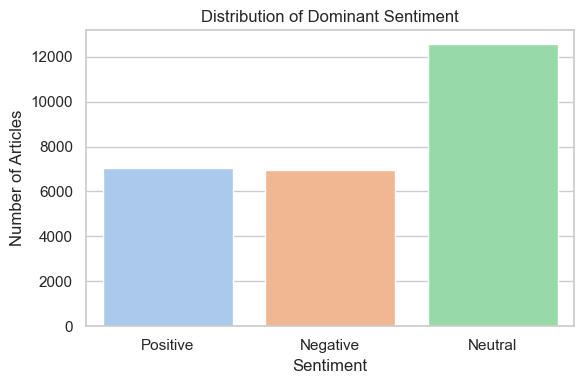

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot the count of each dominant sentiment
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x='Dominant_Sentiment',
    order=['Positive', 'Negative', 'Neutral'],
    palette='pastel'
)

plt.title('Distribution of Dominant Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


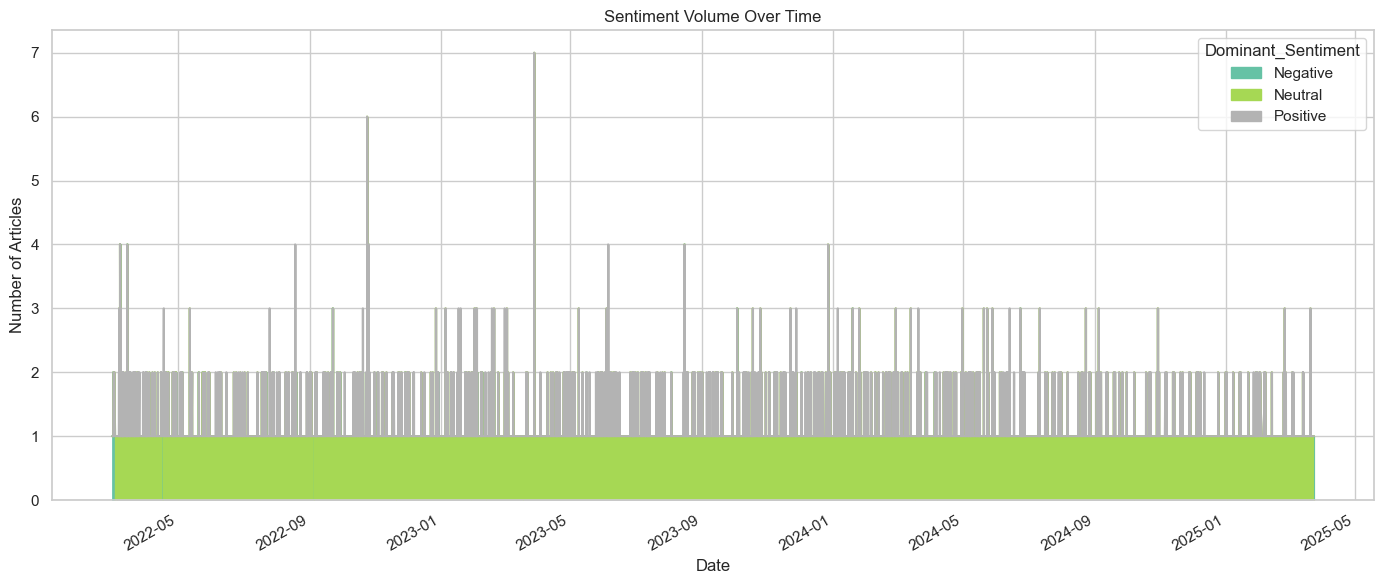

In [26]:
# Group and count by date and dominant sentiment
volume_over_time = df.groupby(['Date', 'Dominant_Sentiment']).size().unstack(fill_value=0)

# Plot stacked area chart
volume_over_time.plot(kind='area', stacked=True, figsize=(14, 6), colormap='Set2')
plt.title('Sentiment Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


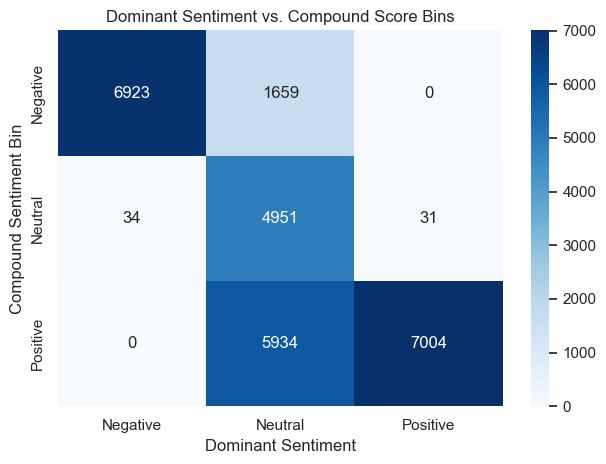

In [29]:
sentiment_bins = pd.cut(df['Compound'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])
confusion = pd.crosstab(sentiment_bins, df['Dominant_Sentiment'])

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Dominant Sentiment vs. Compound Score Bins')
plt.xlabel('Dominant Sentiment')
plt.ylabel('Compound Sentiment Bin')
plt.tight_layout()
plt.show()


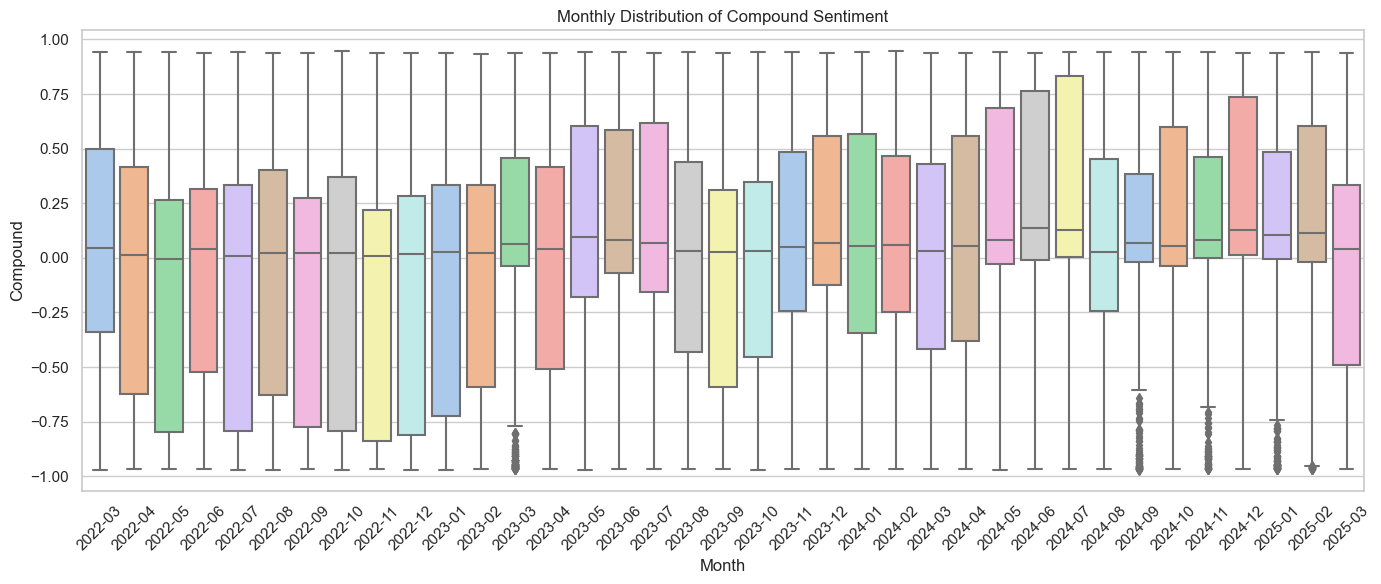

In [32]:
# Generate 'Month' from datetime index
df['Month'] = df.index.to_period('M').astype(str)

# Create boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Month', y='Compound', palette='pastel')
plt.xticks(rotation=45)
plt.title('Monthly Distribution of Compound Sentiment')
plt.tight_layout()
plt.show()


In [33]:
from collections import Counter
import matplotlib.pyplot as plt
import re


In [36]:
# Combine all text into one string
all_text = ' '.join(df['Context'].dropna().astype(str))

# Lowercase and remove non-alphabetic characters
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())

# Split into words
words = all_text.split()

# Optional: remove common stopwords
stopwords = set([
    'the', 'and', 'to', 'of', 'in', 'a', 'is', 'on', 'for', 'with', 'at', 'by',
    'an', 'be', 'has', 'that', 'this', 'as', 'are', 'from', 'was', 'have', 'it', 'its'
])
filtered_words = [word for word in words if word not in stopwords]


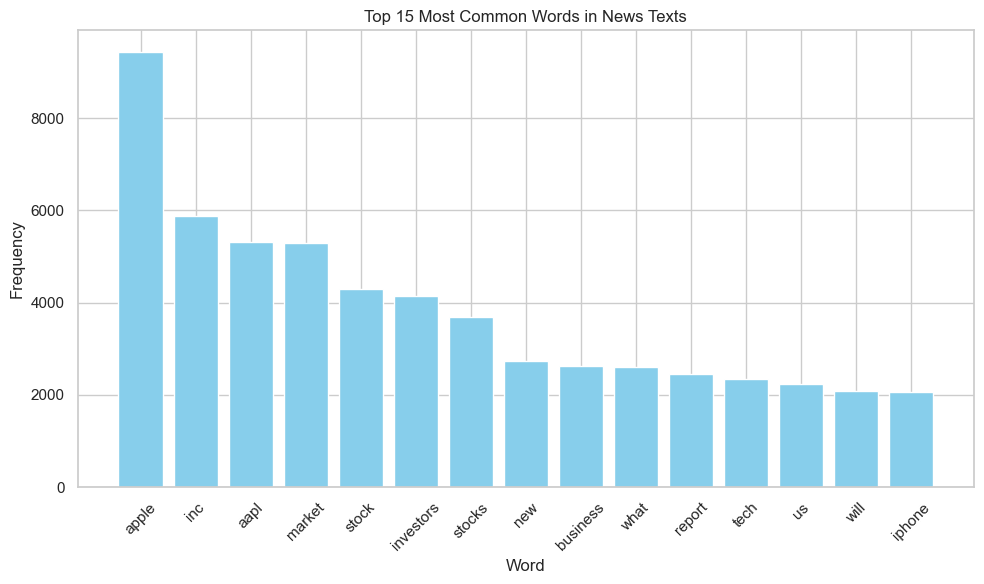

In [37]:
# Count word frequencies
word_counts = Counter(filtered_words)

# Get the top 15 most common words
most_common_words = word_counts.most_common(15)

# Separate words and counts for plotting
labels, counts = zip(*most_common_words)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 15 Most Common Words in News Texts')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [38]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # Only needed once


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S145\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [39]:
stop_words = set(stopwords.words('english'))

# Tokenize and filter
filtered_words = [word for word in words if word not in stop_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S145\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


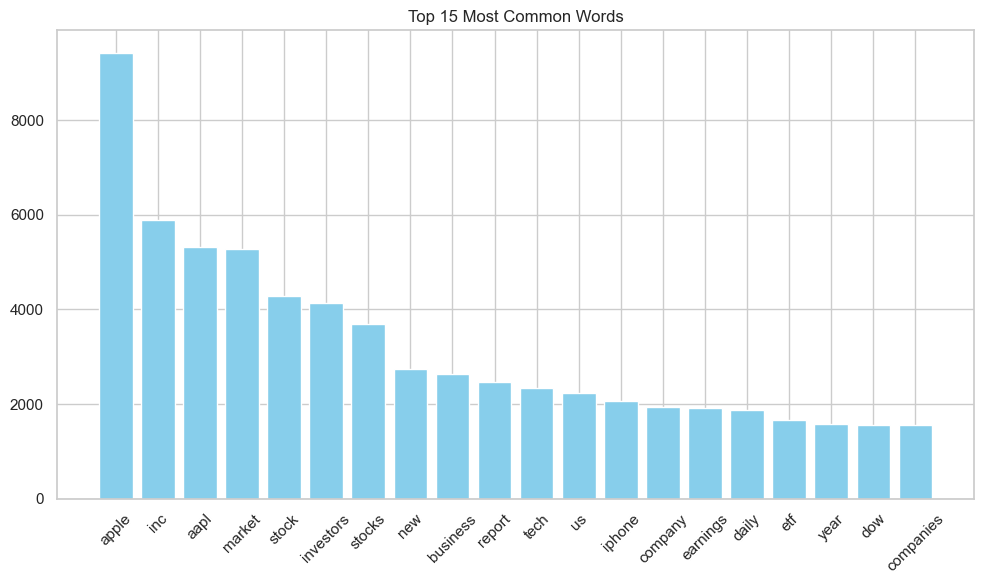

In [41]:
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Combine all text from 'Context' column
all_text = ' '.join(df['Context'].dropna().astype(str))

# Clean text
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())
words = all_text.split()

# Remove stopwords using nltk
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count most common
word_counts = Counter(filtered_words)
most_common = word_counts.most_common(20)

# Plot
labels, counts = zip(*most_common)
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 15 Most Common Words')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S145\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Trigrams by Sentiment:
                             Positive                  Negative  \
0                      apple inc aapl            apple inc aapl   
1            investors business daily  investors business daily   
2                     apple incs aapl         dow jones futures   
3                    grow usd billion           apple incs aapl   
4  taiwan semiconductor manufacturing          apple inc nasdaq   
5                   dow jones futures           inc nasdaq aapl   
6                cagr forecast period        meta platforms inc   
7                    nvidia corp nvda           inc aapl shares   
8          artificial intelligence ai        stock market today   
9                dow jones industrial        jones futures fall   

                    Neutral  
0            apple inc aapl  
1  investors business daily  
2             style box etf  
3            box etf report  
4            smart beta etf  
5           beta etf report  
6           apple incs aa

C:\Users\S145\AppData\Local\Temp\ipykernel_3256\1519406902.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


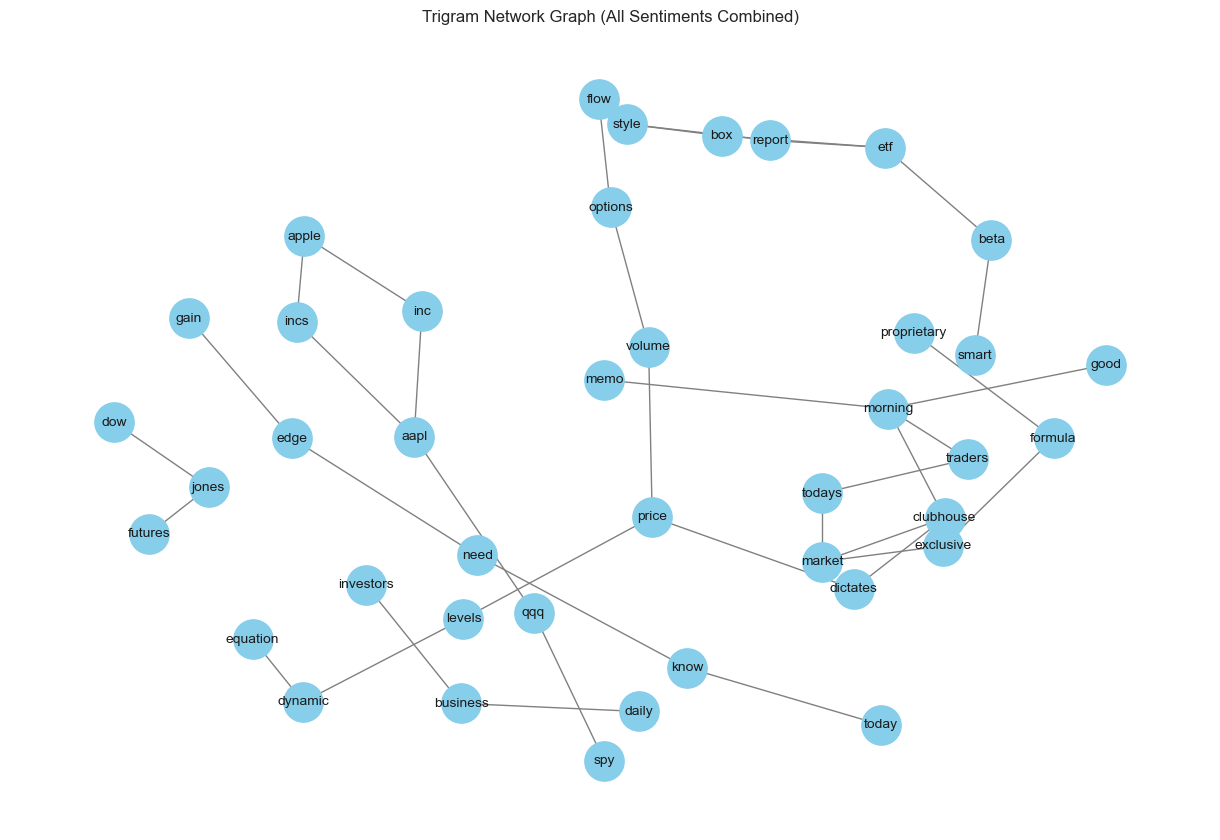

In [42]:
# --- Required Libraries ---
import pandas as pd
import re
from collections import Counter
from nltk import trigrams
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# --- Load NLTK Stopwords ---
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# --- Load Your Data ---
df = pd.read_csv("Finbert_output_AAPL.csv")  # change path if needed

# --- Create Dominant Sentiment Column ---
if 'Dominant_Sentiment' not in df.columns:
    df['Dominant_Sentiment'] = df[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)

# --- Function: Top Trigrams by Sentiment ---
def get_top_trigrams_by_sentiment(df, sentiment_label, top_n=10):
    filtered_df = df[df['Dominant_Sentiment'] == sentiment_label]
    all_text = ' '.join(filtered_df['Context'].dropna().astype(str)).lower()
    cleaned = re.sub(r'[^a-z\s]', '', all_text)
    tokens = [w for w in cleaned.split() if w not in stop_words]
    trigram_phrases = [' '.join(t) for t in trigrams(tokens)]
    trigram_counts = Counter(trigram_phrases)
    return trigram_counts.most_common(top_n)

# --- Get Top Trigrams ---
top_pos = get_top_trigrams_by_sentiment(df, 'Positive')
top_neg = get_top_trigrams_by_sentiment(df, 'Negative')
top_neu = get_top_trigrams_by_sentiment(df, 'Neutral')

# --- Display Comparison Table ---
comparison_df = pd.DataFrame({
    'Positive': [t[0] for t in top_pos],
    'Negative': [t[0] for t in top_neg],
    'Neutral': [t[0] for t in top_neu]
})
print("Top Trigrams by Sentiment:")
print(comparison_df)

# --- Optional: Save to CSV ---
# comparison_df.to_csv("trigrams_by_sentiment.csv", index=False)

# --- Build Global Trigram Network ---
all_text = ' '.join(df['Context'].dropna().astype(str)).lower()
cleaned = re.sub(r'[^a-z\s]', '', all_text)
tokens = [w for w in cleaned.split() if w not in stop_words]
trigram_phrases = [' '.join(tg) for tg in trigrams(tokens)]
trigram_counts = Counter(trigram_phrases)
top_trigrams = trigram_counts.most_common(30)

# --- Create Network Graph ---
G = nx.Graph()
for phrase, _ in top_trigrams:
    w1, w2, w3 = phrase.split()
    G.add_edge(w1, w2)
    G.add_edge(w2, w3)

# --- Visualize Graph ---
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(
    G, pos,
    with_labels=True,
    node_size=800,
    node_color="skyblue",
    edge_color="gray",
    font_size=10
)
plt.title("Trigram Network Graph (All Sentiments Combined)")
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import networkx as nx
from nltk import trigrams

# Load data
df = pd.read_csv("Finbert_output_AAPL.csv")  # Adjust path if needed

# Define fallback stopwords manually
stop_words = {
    'the', 'and', 'to', 'of', 'in', 'a', 'is', 'on', 'for', 'with', 'at', 'by',
    'an', 'be', 'this', 'has', 'that', 'are', 'from', 'was', 'it', 'as', 'its',
    'have', 'or', 'but', 'not', 'also', 'been', 'which', 'will', 'more', 'their'
}

# Create Dominant Sentiment column if missing
df['Dominant_Sentiment'] = df[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)

# Trigram extractor function
def extract_trigrams(text_series):
    text = ' '.join(text_series.dropna().astype(str)).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [w for w in text.split() if w not in stop_words]
    return [' '.join(t) for t in trigrams(tokens)]

# Top N trigrams per sentiment
def get_top_trigrams_by_sentiment(sentiment_label, top_n=10):
    subset = df[df['Dominant_Sentiment'] == sentiment_label]
    trigrams_list = extract_trigrams(subset['Context'])
    return Counter(trigrams_list).most_common(top_n)


C:\Program Files\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


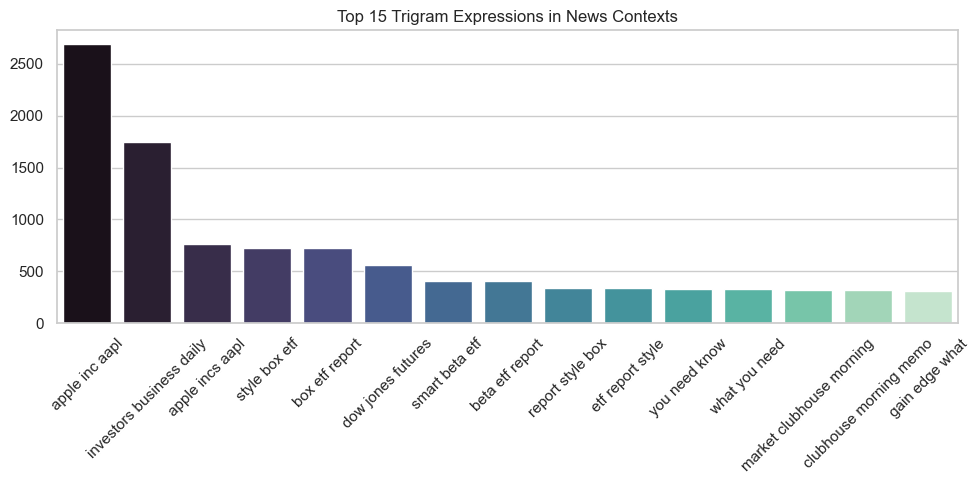

In [44]:
# Global trigrams
all_trigrams = extract_trigrams(df['Context'])
trigram_counts = Counter(all_trigrams)
top_trigrams = trigram_counts.most_common(15)

# Bar chart
labels, counts = zip(*top_trigrams)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(labels), y=list(counts), palette="mako")
plt.title("Top 15 Trigram Expressions in News Contexts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Program Files\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Program Files\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Program Files\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


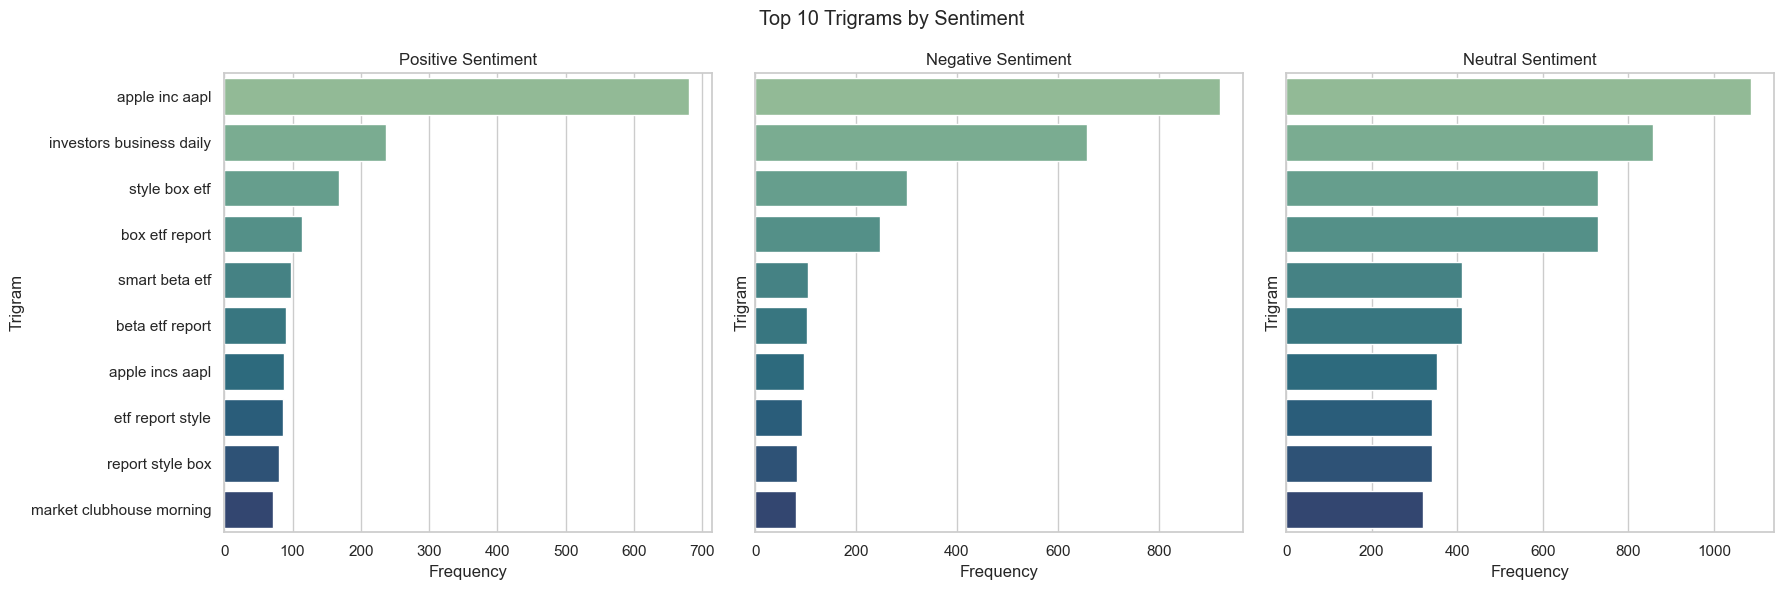

In [45]:
top_pos = get_top_trigrams_by_sentiment('Positive')
top_neg = get_top_trigrams_by_sentiment('Negative')
top_neu = get_top_trigrams_by_sentiment('Neutral')

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for ax, (label, top_data) in zip(axes, [('Positive', top_pos), ('Negative', top_neg), ('Neutral', top_neu)]):
    trigram_labels, trigram_counts = zip(*top_data)
    sns.barplot(x=list(trigram_counts), y=list(trigram_labels), ax=ax, palette='crest')
    ax.set_title(f"{label} Sentiment")
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Trigram')
plt.suptitle("Top 10 Trigrams by Sentiment")
plt.tight_layout()
plt.show()
